In [68]:
import numpy as np
import librosa.display
import IPython.display as ipd
from matplotlib import pyplot as plt

In [69]:
audio = 'data/piano_c.wav'
sample_rate = librosa.get_samplerate(audio)
signal, sr = librosa.load(audio, sr=sample_rate)

In [70]:
librosa.get_duration(y=signal, sr=sr)

1.540498866213152

In [91]:
ipd.Audio('data/piano_c.wav')

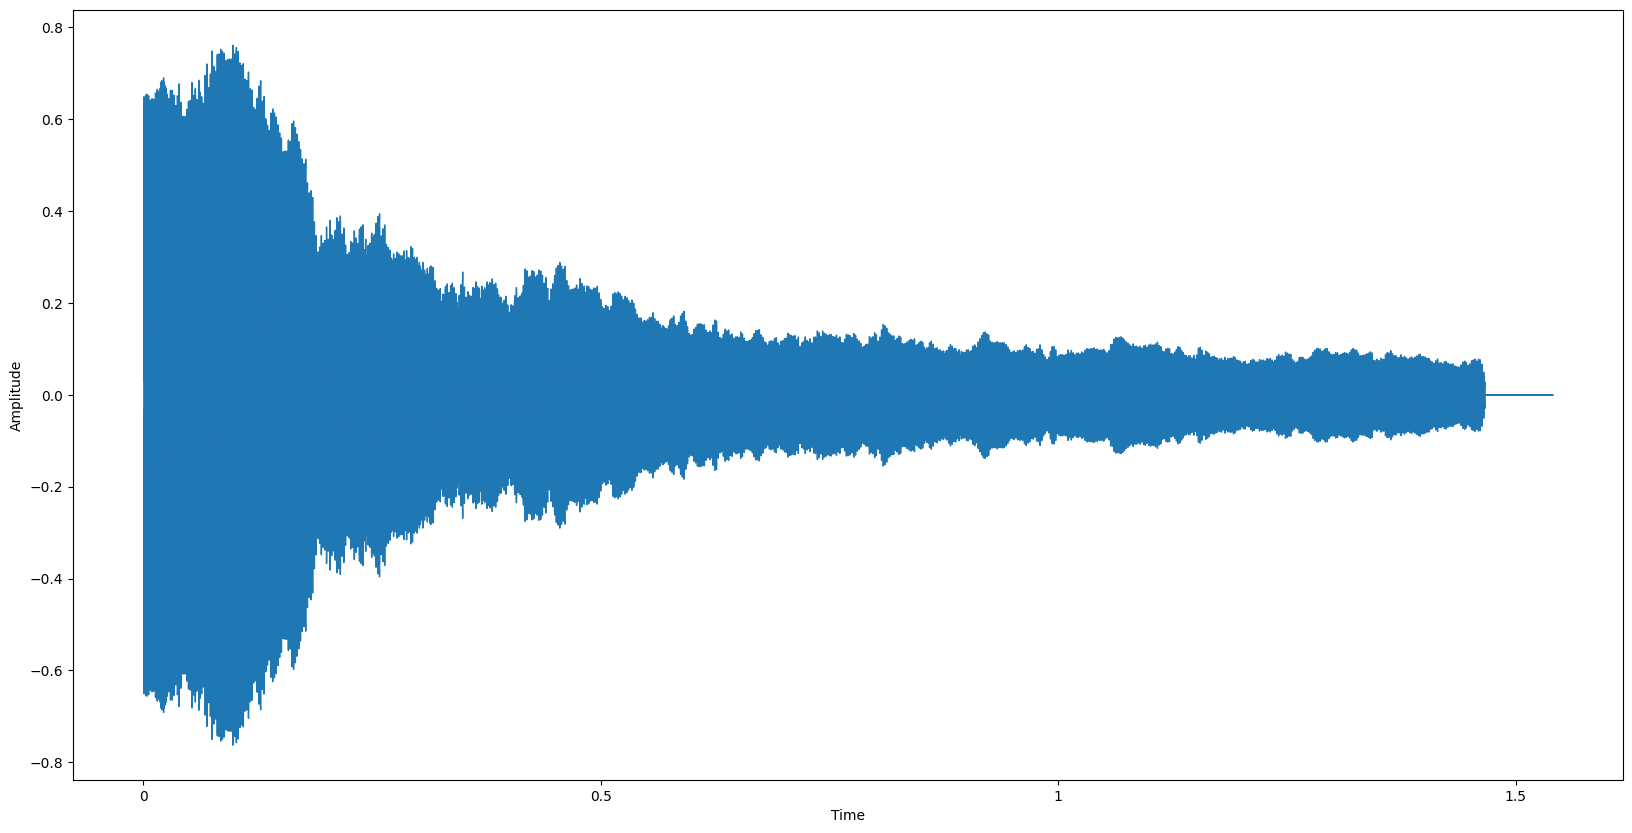

In [72]:
plt.figure(figsize=(20, 10))
librosa.display.waveshow(y=signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Energy

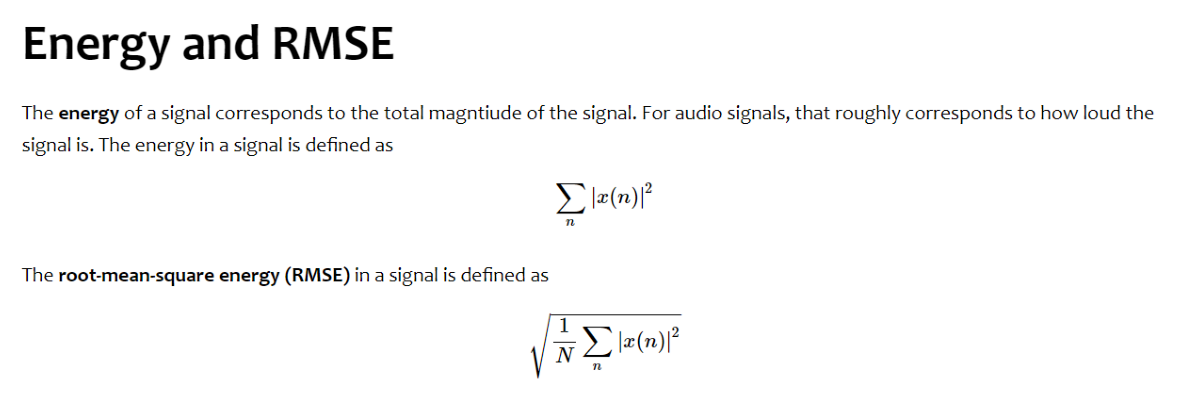

In [73]:
plt.figure(figsize=(15, 10))
plt.imshow(plt.imread('data/energy.png'))
plt.axis('off')
plt.show()

In [84]:
FRAME_SIZE = 512
HOP_SIZE = 256

In [85]:
energy = np.array([sum(abs(signal[i:i + FRAME_SIZE] ** 2)) for i in range(0, len(signal), HOP_SIZE)])

In [86]:
energy.shape

(266,)

# RMSE

In [87]:
rmse = librosa.feature.rms(y=signal, frame_length=FRAME_SIZE, hop_length=HOP_SIZE, center=True)[0]

In [88]:
rmse.shape

(266,)

In [89]:
frames = range(len(energy))
time = librosa.frames_to_time(frames, sr=sr, hop_length=HOP_SIZE)

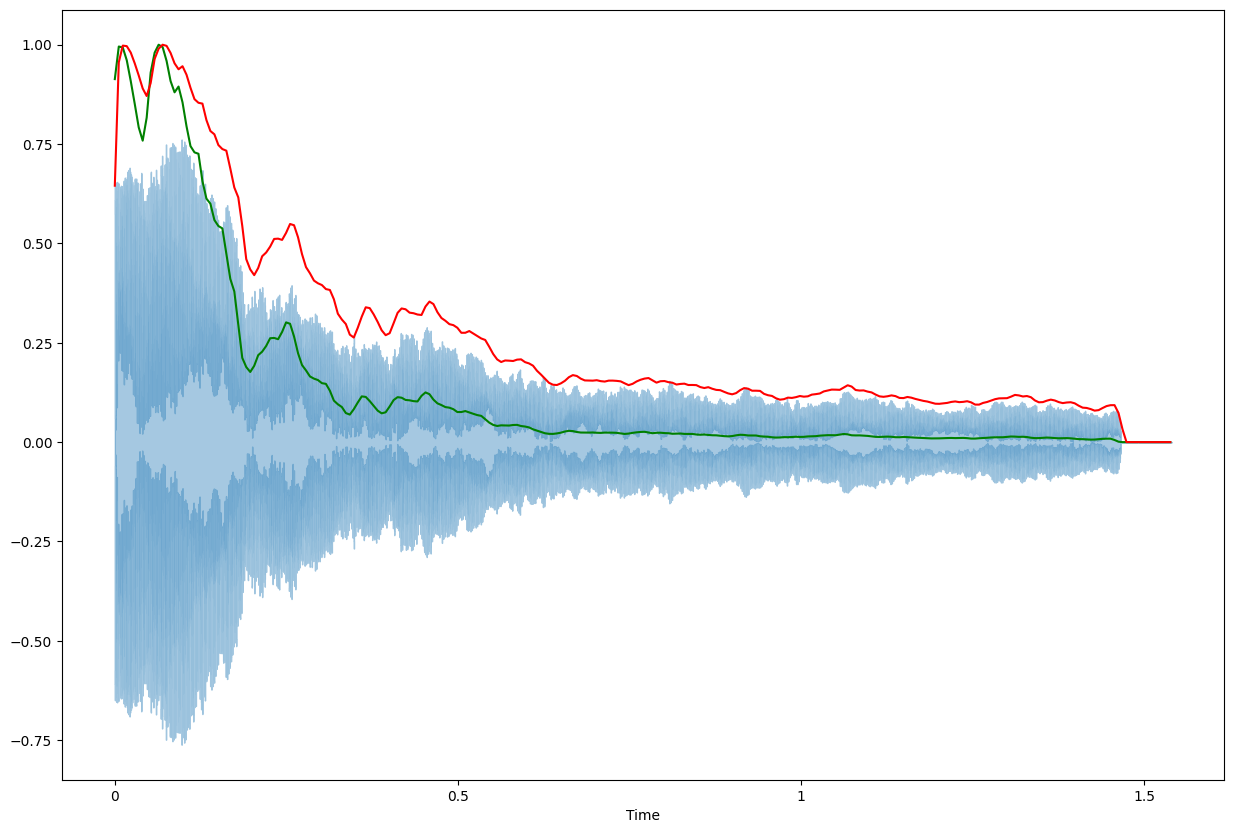

In [90]:
plt.figure(figsize=(15, 10))
librosa.display.waveshow(signal, sr=sr, alpha=0.4)

# we have to use normalized energy and rmse to visualization
plt.plot(time, energy/energy.max(), color='green')
plt.plot(time[:len(rmse)], rmse/rmse.max(), color= 'red')   
plt.show()

# remove leading silence from any signal